# Ising 模型と 温度交換法で遊んで見る

In [1]:
import matplotlib.pylab as plt
import numpy as np

In [2]:
run 'ferro_ising_exmcmc.py'

100%|██████████| 5000/5000 [02:48<00:00, 29.68it/s]


In [119]:
# 温度パラメータ
model.betas

[0.0,
 0.04398046511104,
 0.0549755813888,
 0.068719476736,
 0.08589934592,
 0.1073741824,
 0.134217728,
 0.16777216,
 0.2097152,
 0.262144,
 0.32768,
 0.4096,
 0.512,
 0.64,
 0.8,
 1.0,
 1.25,
 1.5625,
 1.953125,
 2.44140625,
 3.0517578125,
 3.814697265625,
 4.76837158203125,
 5.9604644775390625]

## ログデータのデータ構造

mclog は dict 型，key として 'Elog', 'Slog', 'Exlog' でそれぞれ，エネルギー，状態，交換状況のデータ

* mclog['Elog'] は，エネルギーの状態遷移， ２次元の配列で，１次元目がトライアル番号，２次元目が温度番号
* mclog['Slog'] は，　磁化状態， 3次元の配列で，１次元目がトライアル番号，２次元目が温度番号，３次元目が素子番号
* mclog['Exlog'] は，　交換の状態， 3次元の配列で，１次元目がトライアル番号，２次元目が温度番号，３次元目が素子番号


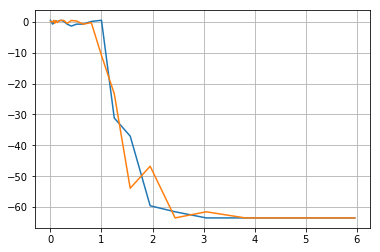

In [57]:
# 横軸に逆温度，縦軸にエネルギーをプロット
# 多分温度１で相転移するはず．最初のトライアルと最後のトライアルをプロットしてみる

plt.plot(model.betas, mclog['Elog'][0,:])
plt.plot(model.betas, mclog['Elog'][4999,:])
plt.grid()

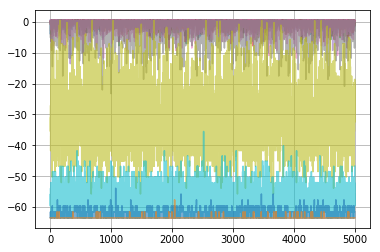

In [59]:
# エネルギーを５０００回のトライアルでプロット

for k in range(0, 24, 2):
    plt.plot(mclog['Elog'][:,k], alpha=0.6)

plt.grid()

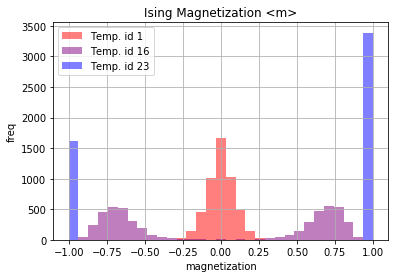

In [121]:
# 平均磁化 <m> をヒストグラムとしてプロット
sbins = np.linspace(-1, 1, 32)
plt.figure()

for k, c in zip((1, 16, 23), ('red', 'purple', 'blue')):
    labelstr='Temp. id %d' % (k)
    plt.hist(mclog['Slog'][:, k, :].mean(axis=1), color=c, bins=sbins, alpha=0.5, label=labelstr)

plt.grid()
plt.title('Ising Magnetization <m>')
plt.xlabel('magnetization')
plt.ylabel('freq')
plt.legend()
plt.show()

In [93]:
mm = mclog['Slog'].mean(axis=2)

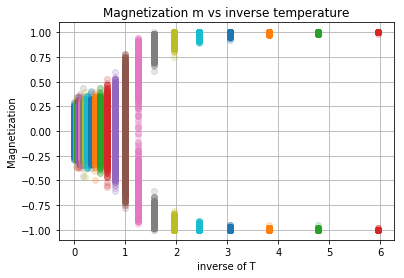

In [115]:
#温度に対する平均磁化の散布図

for k in range(24):
    plt.plot(np.repeat(model.betas[k], mm.shape[0]), mm[:, k],'o', alpha=0.2)
plt.grid()
plt.title('Magnetization m vs inverse temperature')
plt.xlabel('inverse of T')
plt.ylabel('Magnetization')
plt.show()